<a href="https://colab.research.google.com/github/caotiendl/automatic-send-email/blob/main/tinh_profit_va_lost_cua_cty_adi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel('dataa.xlsx')

#print(df.head())
#print(df.tail())
total_sale = df['Total Sales'].sum()
print('total sales of addias',total_sale)
total_profit = df['Operating Profit'].sum()
print('total profit of addias',total_profit)
avg_price = df['Price per Unit'].mean()
print('average  price of addidas',avg_price)
total_unit_sold = df['Units Sold'].sum()
print('total unit sold of addidas',total_unit_sold)






Saving dataa.xlsx to dataa (1).xlsx
total sales of addias 899902125.0
total profit of addias 332134761.45000005
average  price of addidas 45.21662520729685
total unit sold of addidas 2478861


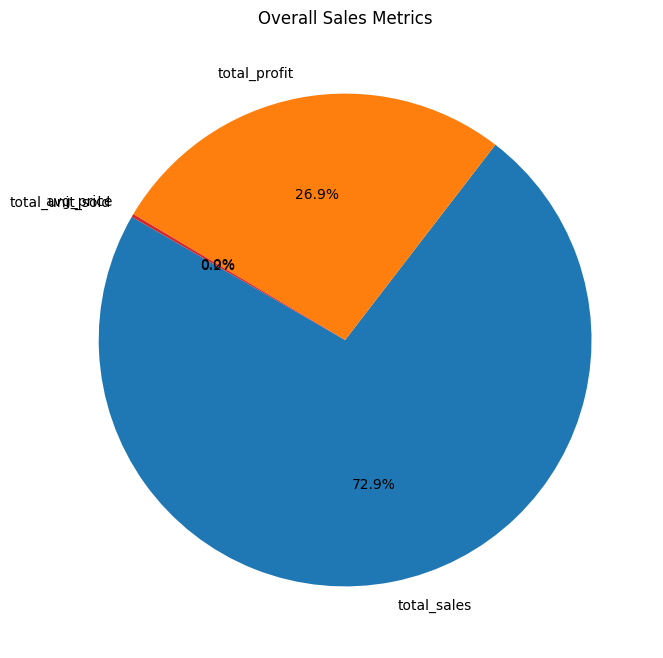

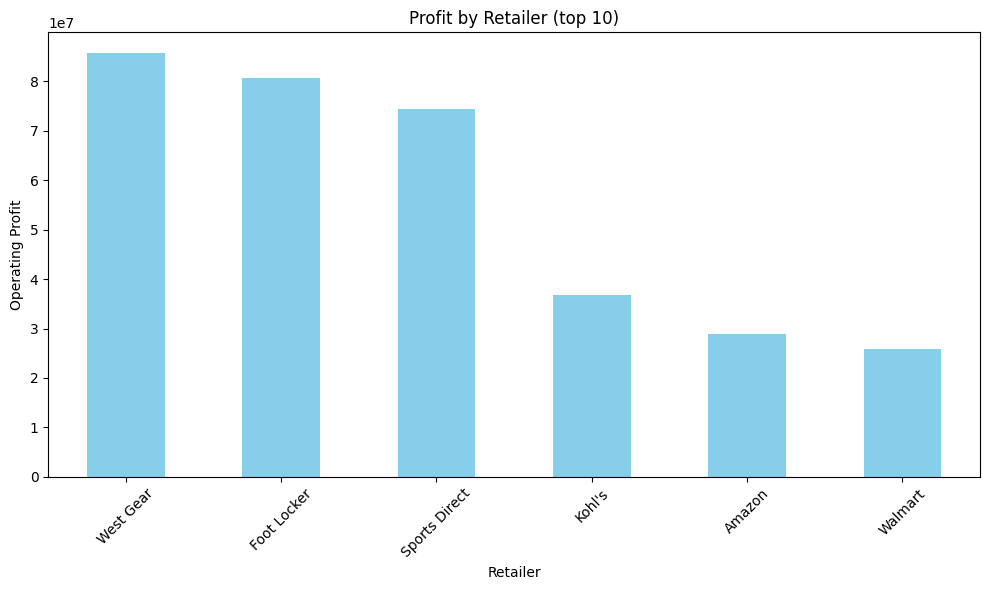

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['total_sales', 'total_profit','avg_price','total_unit_sold']
values = [total_sale,total_profit,avg_price,total_unit_sold]
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=150)
plt.title('Overall Sales Metrics')
plt.show()

profit_by_retailer = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending = False)
top_retailers = profit_by_retailer.head(10)
plt.figure(figsize=(10,6))
top_retailers.plot(kind = 'bar', color = 'skyblue')
plt.title('Profit by Retailer (top 10)')
plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.xticks( rotation = 45)
plt.tight_layout()

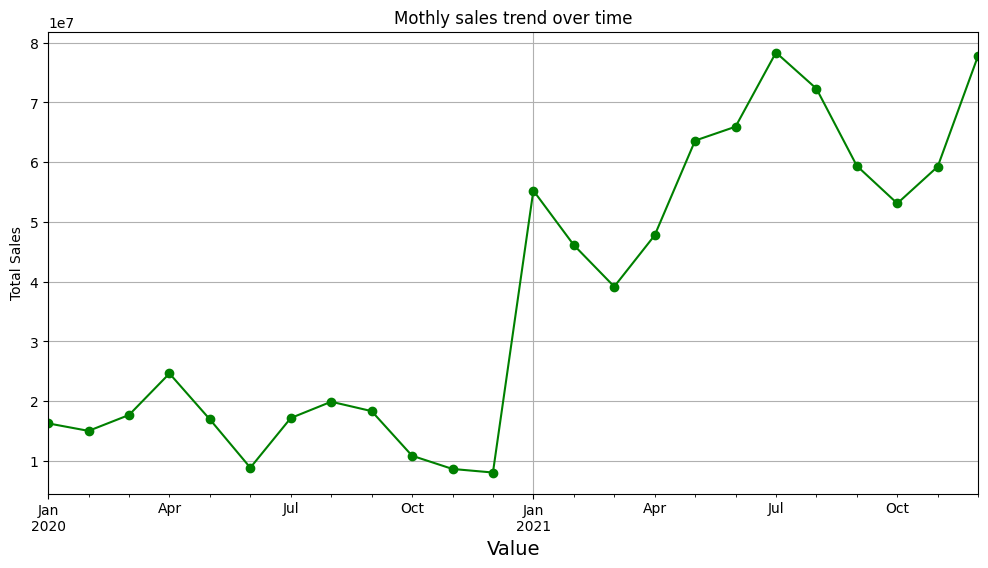

In [5]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
monthly_sales = df.resample('M', on = 'Invoice Date')['Total Sales'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind ='line', marker = 'o', color = 'green')
plt.title('Mothly sales trend over time')
plt.xlabel('Value',fontsize=14)
plt.ylabel('Total Sales')
plt.grid()

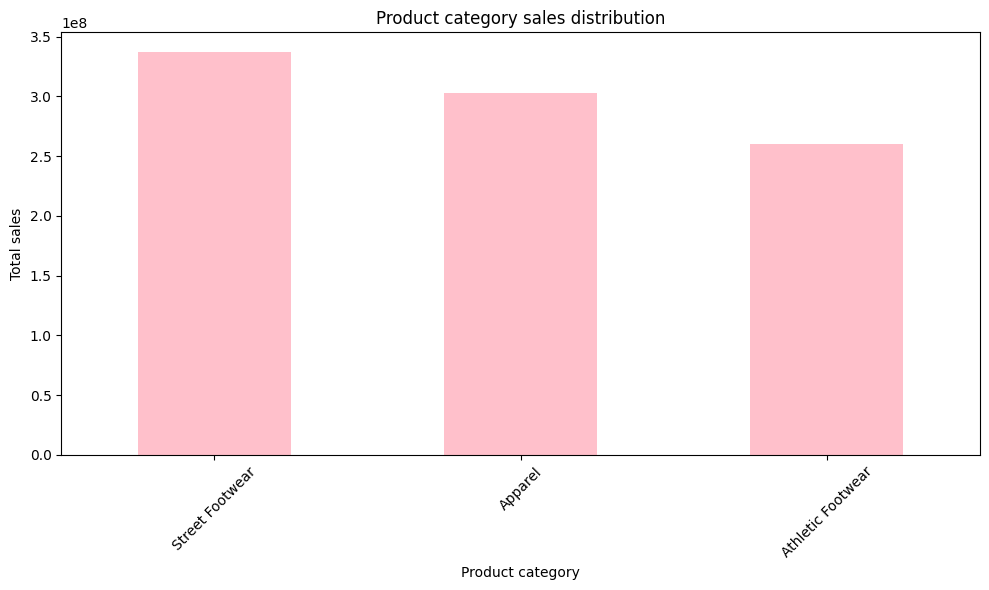

In [9]:
category_sales =df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,6))
category_sales.plot(kind = 'bar', color ='pink')
plt.title('Product category sales distribution')
plt.xlabel('Product category')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

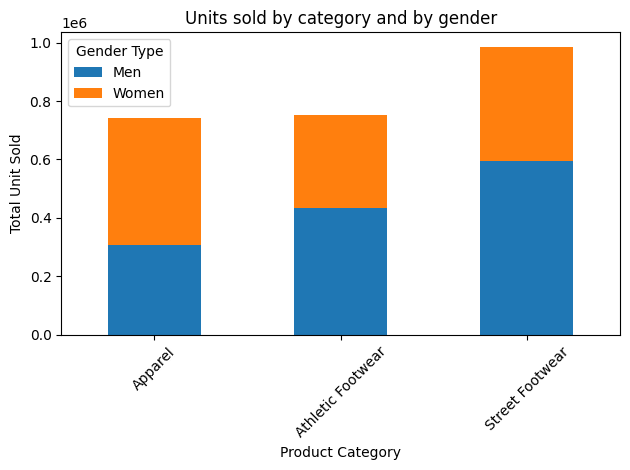

In [14]:
units_sold_by_category_gender = df.groupby(['Product Category','Gender Type'])['Units Sold'].sum()
units_sold_by_category_gender = units_sold_by_category_gender.unstack()
plt.figure(figsize=(12,6))
units_sold_by_category_gender.plot(kind='bar', stacked= True)
plt.title('Units sold by category and by gender')
plt.xlabel('Product Category')
plt.ylabel('Total Unit Sold')
plt.xticks(rotation=45)
plt.tight_layout()

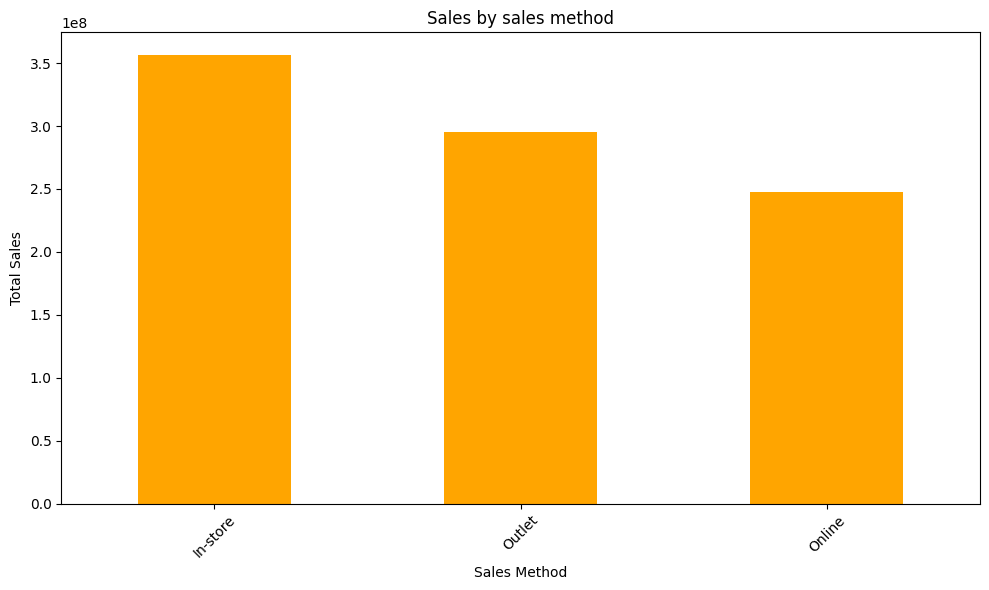

In [15]:
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sales_by_method.plot(kind ='bar',color = 'orange')
plt.title('Sales by sales method')
plt.xlabel('Sales Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()


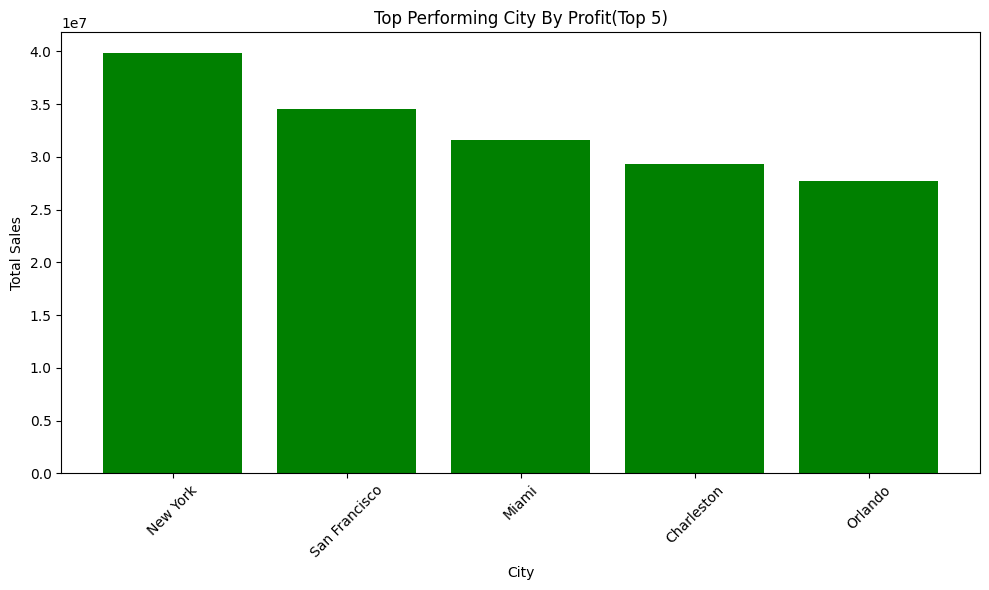

In [19]:
region_sales = df.groupby(['Region','State','City'])['Total Sales'].sum().reset_index()

top_cities_by_profit = region_sales.sort_values(by='Total Sales',ascending=False).head(5)
plt.figure(figsize=(10,6))
plt.bar(top_cities_by_profit['City'],top_cities_by_profit['Total Sales'],color = 'green')
plt.title('Top Performing City By Profit(Top 5)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

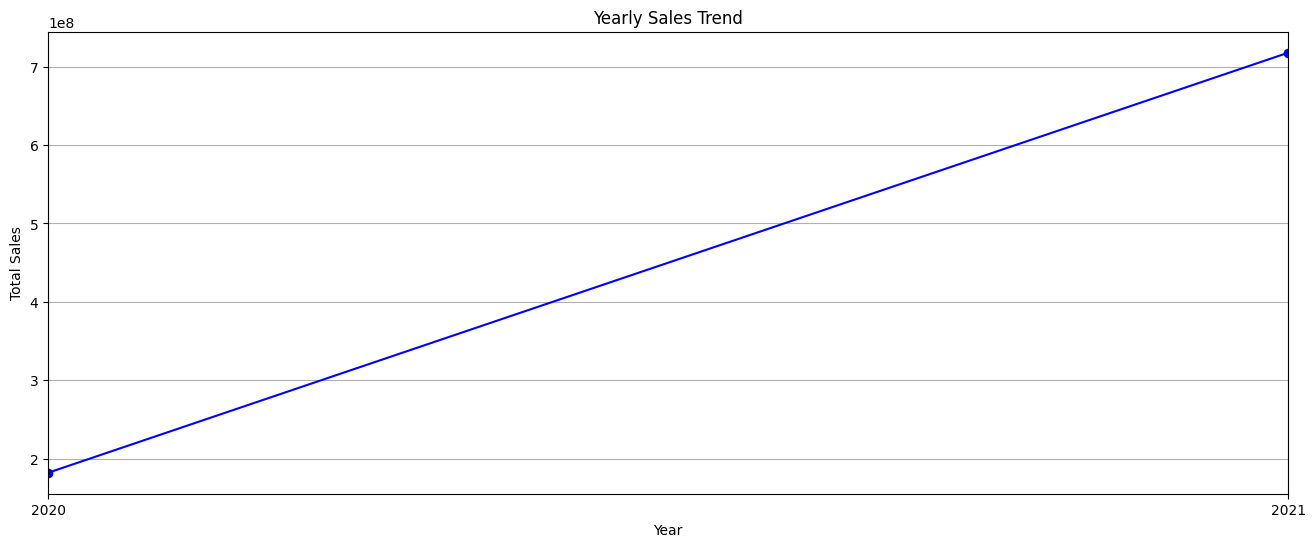

In [25]:
yearly_sales = df.resample('Y',on='Invoice Date')['Total Sales'].sum()
plt.figure(figsize=(16,6))
yearly_sales.plot(kind='line', marker='o',color ='blue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()